## Pre-processing

#### Loading data from corpus

In [1]:
import pandas as pd 

In [2]:
data=pd.DataFrame()
import os
for i in os.listdir('./Dataset/phishing/'):
    dataa_new=pd.read_csv('./Dataset/phishing/'+i)
    lable=dataa_new['content']
    nhan=[1]*len(lable)
    data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))

data=data.dropna()
print(data.shape)

/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method i

(4158, 2)


/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_1345/354482346.py:7: FutureWarning: The frame.append method i

In [3]:
data_enron=pd.DataFrame()
for i in os.listdir('./Dataset/enron/'):
    dataa_new=pd.read_csv('./Dataset/enron/'+i)

    lable=dataa_new['content']
    nhan=[0]*len(lable)
    data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))
    data_enron=data_enron.dropna()
    data_enron=data_enron.drop(data_enron.index[1:678])
    print(data_enron.shape)
    break
data=pd.concat([data,data_enron])
# data=data.dropna()
print(data.head)

(4196, 2)
<bound method NDFrame.head of                                                    Text  Class
0                                                     .      1
1     Dear Customer,\n\nCheck AMERICAN EXPRESS  Atta...      1
2     Request to Update Your Email\n \n\n \n \n    \...      1
3     Mail Quota: (98% Full)\n\n\n\n\n\nAttention:Â ...      1
4     Confirm Your Transactions\n\n \n \n   \n\t \n ...      1
...                                                 ...    ...
4995  Dzien dobry,\n\nMam nadzieje, ze nic sie nie z...      0
4996  This message is to remind you of your opportun...      0
4997  Juliusz,\n\nSorry, I have to cancel the lunch ...      0
4998  Przepraszam, ze tak dlugo nie odpowiadalem. Na...      0
4999  David,\n\nThe CUSIP of the bond I have is  694...      0

[8354 rows x 2 columns]>


/tmp/ipykernel_1345/1370219814.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))


#### Cleaning data

In [5]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [6]:
from nltk.corpus import wordnet 
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
data['Text']=data['Text'].apply(lambda x: remove_stopwords(x))
data['Text']=data['Text'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word,pos=wordnet.VERB) for word in x.split()]))

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

/home/haiyen/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


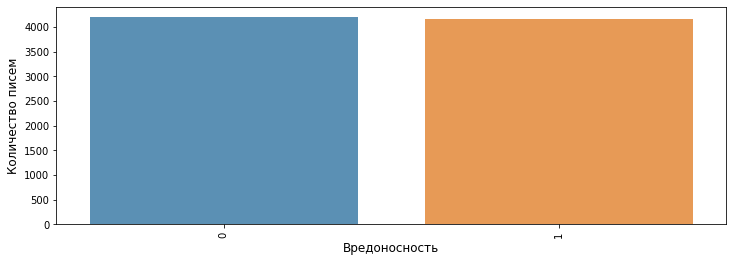

In [8]:
cnt_pro = data['Class'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Количество писем', fontsize=12)
plt.xlabel('Вредоносность', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [9]:
from bs4 import BeautifulSoup
import re
def cleanText(text):
    text = BeautifulSoup(text, "html.parser").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
data['Text'] = data['Text'].apply(cleanText)

/home/haiyen/.local/lib/python3.8/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/home/haiyen/.local/lib/python3.8/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "phishing" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [11]:
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

## Training model Doc2Vec

In [12]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [13]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.Class]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.Class]), axis=1)

In [14]:
train_tagged.shape

(5847,)

In [15]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [16]:
model_dbow = Doc2Vec()
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 5847/5847 [00:00<00:00, 689886.79it/s]


In [17]:
from sklearn import utils

In [18]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 5847/5847 [00:00<00:00, 383494.59it/s]


CPU times: user 1min 19s, sys: 15.4 s, total: 1min 34s
Wall time: 43 s


In [ ]:
s=train_tagged.values
s[0]

In [19]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [20]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [21]:
X_test[1]

array([-0.06918766, -0.02259286, -0.01983029,  0.08640151, -0.03274136,
       -0.0050548 , -0.06522578,  0.01540485, -0.01220746,  0.04994835,
        0.02837909, -0.07874912, -0.05159414, -0.14313546,  0.01404772,
       -0.06651454, -0.07155256, -0.06879501,  0.02470598,  0.00423747,
        0.02318239,  0.03987081,  0.04353621,  0.09994297,  0.02218898,
       -0.0703913 , -0.11323071, -0.06720468,  0.00777265, -0.1090956 ,
       -0.03904889, -0.03346433, -0.05618434,  0.04829664, -0.06863783,
       -0.07895268, -0.00416355,  0.03585955, -0.04712472, -0.06717499,
       -0.00844182, -0.06434388, -0.04610694, -0.02342108, -0.05772077,
        0.03204371,  0.01565207,  0.04569302, -0.00949727, -0.07901225,
       -0.0008622 ,  0.17956378, -0.05480574, -0.11220548, -0.08274868,
       -0.01795632,  0.04347049,  0.11680898, -0.11884175,  0.02325154,
        0.14968947,  0.03679886,  0.0196774 , -0.07632867,  0.02490964,
        0.00252848,  0.12023969, -0.18237068, -0.04072511, -0.08

## Classification

In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [35]:
model_pip=[]
model_pip.append(('Logistic Regression',LogisticRegression()))
model_pip.append(('Random Forest',RandomForestClassifier()))
model_pip.append(('XGBoost',XGBClassifier()))
model_pip.append(('SVM',SVC(probability=True)))
model_pip.append(('KNN',KNeighborsClassifier()))
model_pip.append(('Naive Bayes',GaussianNB()))
model_pip.append(('Decision Tree',DecisionTreeClassifier()))
model_pip.append(('MLP',MLPClassifier()))
model_pip.append(('AdaBoost',AdaBoostClassifier()))
model_pip.append(('Gradient Boosting',GradientBoostingClassifier()))

In [36]:
acc=[]
f1=[]
precision=[]
recall=[]
roc_auc=[]
conf_mat=[]
cl=[]

In [37]:
for classifier in model_pip:
    classifier[1].fit(X_train,y_train)
    y_pred=classifier[1].predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    roc_auc.append(roc_auc_score(y_test,y_pred))
    conf_mat.append(confusion_matrix(y_test,y_pred))
    cl.append(classifier[1])

/home/haiyen/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/haiyen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
plt.rcParams.update({'font.size': 22})

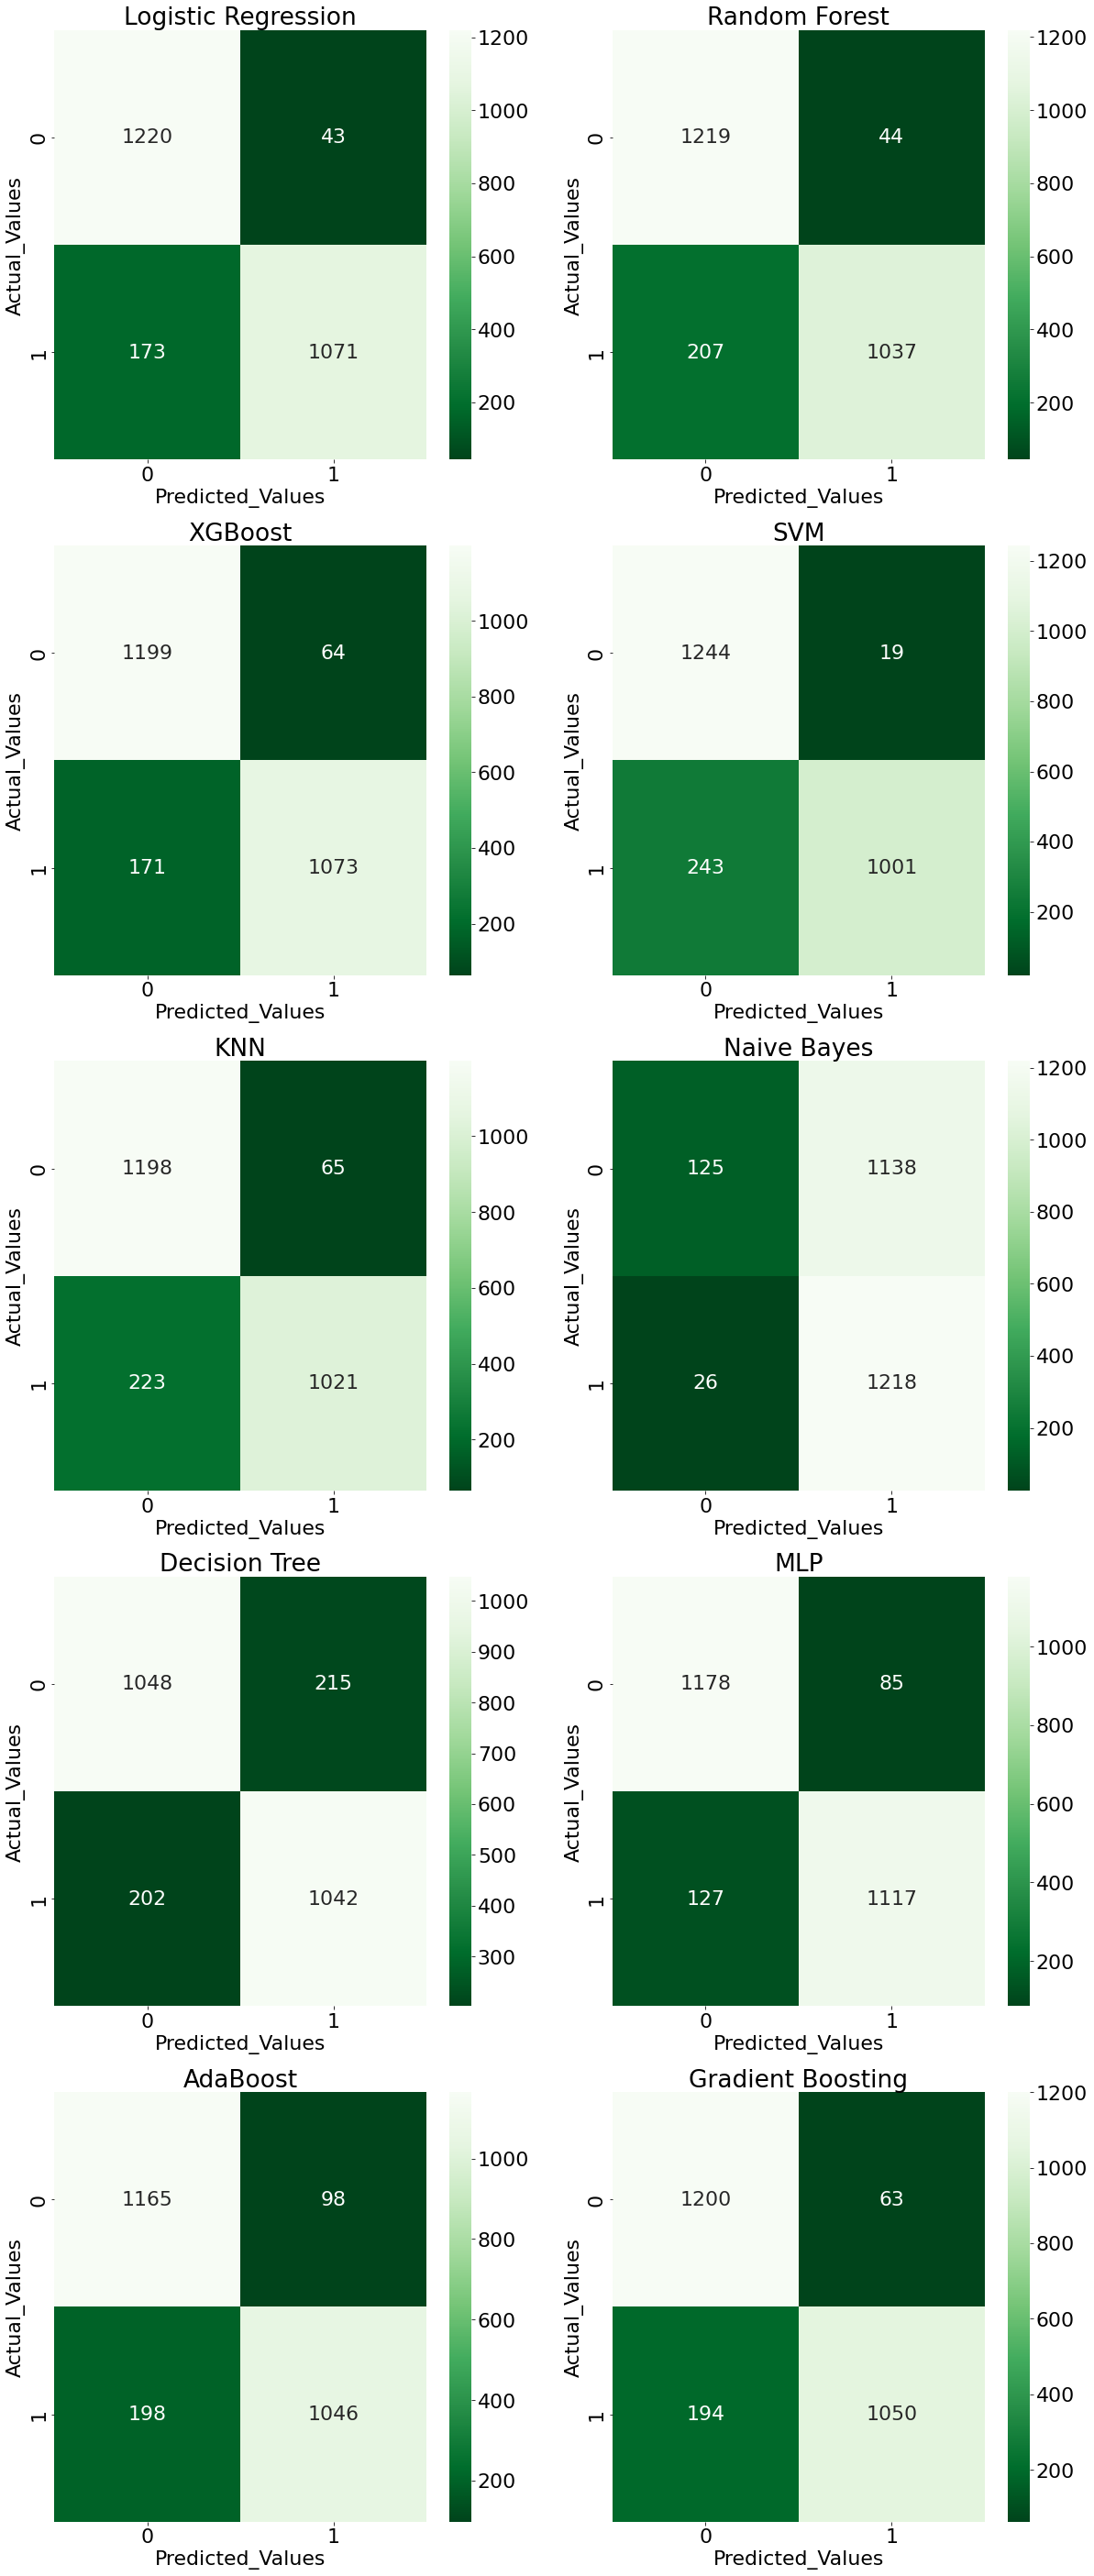

In [39]:
fig=plt.figure(figsize=(20,50))

for i in range(0,len(conf_mat)):
    cm_con=conf_mat[i]
    model=model_pip[i][0]
    sub_fig_title=fig.add_subplot(5,2,i+1).set_title(model)
    plot_map=sns.heatmap(cm_con,annot=True,cmap='Greens_r',fmt='g')
    plot_map.set_xlabel('Predicted_Values')
    plot_map.set_ylabel('Actual_Values')

In [40]:
result=pd.DataFrame({'Model': model_pip, 'Accuracy': acc, 'AUC': roc_auc, 'F1 score': f1, 'Precision': precision, 'Recall': recall})
result

,Model,Accuracy,AUC,F1 score,Precision,Recall
0,"(Logistic Regression, LogisticRegression())",0.913841,0.913443,0.908397,0.961400,0.860932
1,"(Random Forest, (DecisionTreeClassifier(max_fe...",0.899880,0.899382,0.892043,0.959297,0.833601
2,"(XGBoost, XGBClassifier(base_score=0.5, booste...",0.906262,0.905934,0.901302,0.943712,0.862540
3,"(SVM, SVC(probability=True))",0.895493,0.894809,0.884276,0.981373,0.804662
4,"(KNN, KNeighborsClassifier())",0.885122,0.884637,0.876395,0.940147,0.820740
5,"(Naive Bayes, GaussianNB())",0.535700,0.539035,0.676667,0.516978,0.979100
6,"(Decision Tree, DecisionTreeClassifier())",0.833666,0.833695,0.833267,0.828958,0.837621
7,"(MLP, MLPClassifier())",0.915437,0.915305,0.913328,0.929285,0.897910
8,"(AdaBoost, (DecisionTreeClassifier(max_depth=1...",0.881931,0.881621,0.876047,0.914336,0.840836
9,"(Gradient Boosting, ([DecisionTreeRegressor(cr...",0.897487,0.897085,0.890963,0.943396,0.844051


In [41]:
# fig=plt.figure(figsize=(20,30))

# for i in range(0,len(cl)):
#     c=cl[i]
#     model=model_pip[i][0]
#     y_pred_proba=c.predict_proba(X_test)
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
#     auc=roc_auc_score(y_test,y_pred_proba[:,1])
#     sub_fig_title=fig.add_subplot(4,3,i+1).set_title(model)
#     plot_map=sns.lineplot(x=fpr,y=tpr,label='AUC='+str(auc))
#     plot_map.set_xlabel('False Positive Rate')
#     plot_map.set_ylabel('True Positive Rate')


Text(0, 0.5, 'True Positive Rate')

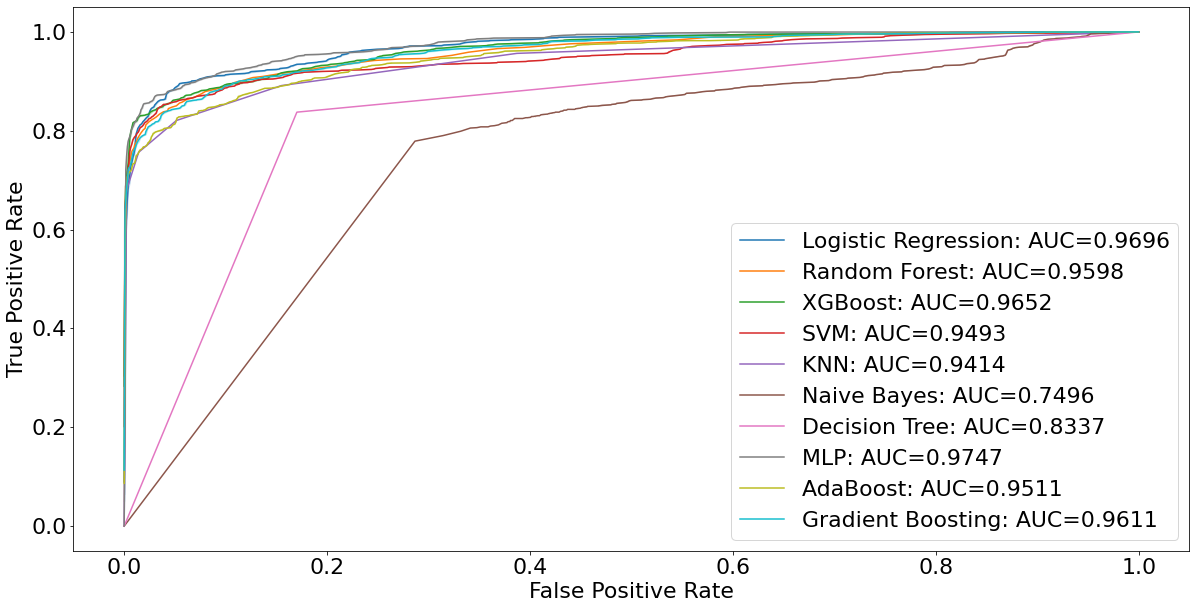

In [42]:
fig=plt.figure(figsize=(20,10))

for i in range(0,len(cl)):
    c=cl[i]
    model=model_pip[i][0]
    y_pred_proba=c.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    auc=roc_auc_score(y_test,y_pred_proba[:,1])
    sub_fig_title=fig.add_subplot(2,5,i+1).set_title(model)
    plot_map=sns.lineplot(x=fpr,y=tpr,label=model+': AUC='+str(round(auc,4)))
plot_map.set_xlabel('False Positive Rate')
plot_map.set_ylabel('True Positive Rate')


In [ ]:
fig=plt.figure(figsize=(20,50))

for i in range(0,len(conf_mat)):
    cm_con=conf_mat[i]
    model=model_pip[i][0]
    sub_fig_title=fig.add_subplot(5,2,i+1).set_title(model)
    plot_map=sns.heatmap(cm_con,annot=True,cmap='Greens_r',fmt='g')
    plot_map.set_xlabel('Predicted_Values')
    plot_map.set_ylabel('Actual_Values')